In [39]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [76]:
#import dataset

cobify=pd.read_excel('measurements2.xlsx')
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


### 1 Introduction (from Kaggle): 

Drive the same car and take almost always the same route. At the gas station aletrnate the gas type; between SP98 (sold as “Super plus” sometimes) and SP95 E10 (This is, “super” gas with 10% Alcohol). E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

The car consumes a lot more with E10. From the data, what can we derive there?

For a few months data of the car’s display after each ride was recorded, while regularly changing the gas type.

In the file, there is:

the displayed distance (km); the consumption (L/100km); the average speed (km/h), the temperature inside (°C) the car, the temperature outside (°C) the car, anything special that happened, if it was raining, if the air condition was on, and the gas type.

The plan is to answer the following:

Which gas is consumed the most? What is the relationship amongst the variables

… and also clean any other infomation possible.

### 2. Each row: data of car's display after each ride; while regularly changing the gas type (more from Kaggle)
-From kaggle, heading of dataset is: "Which of two fuels is cheaper, E10 or SP 98?"

-I challenge you to predict the consumption depending on the gas type!

In [77]:
#standardize heading names to snake case

cols = []
for i in range(len(cobify.columns)):
    cols.append(cobify.columns[i].lower().replace(' ','_')) # I've added the snake, using .replace('', '_')
cobify.columns = cols
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [78]:
cobify.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [82]:
#converting commas to periods in numerical columns

# cobify['distance'] = cobify['distance'].apply(lambda x: x.replace(',', '.')).astype('float')
# cobify['consume'] = cobify['consume'].apply(lambda x: x.replace(',', '.')).astype('float')
# cobify["temp_inside"] = cobify["temp_inside"].str.replace(',','.').astype('float')


In [83]:
#temp_outside is an integer, change it into a string first
cobify['temp_outside']= cobify['temp_outside'].astype(str) 
cobify["temp_outside"] = cobify["temp_outside"].str.replace(',','.').astype('float')

In [84]:
cobify.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [85]:
#next let's check NaN and unique values and duplicates

In [86]:
nulls_percent_df = pd.DataFrame(cobify.isna().sum()/len(cobify)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,0.030928
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,ac,0.000000
8,rain,0.000000
9,sun,0.000000


In [87]:
cobify['gas_type']. value_counts(dropna=False)  #only 2 gas types 

SP98    228
E10     160
Name: gas_type, dtype: int64

In [88]:
cobify['ac']. value_counts(dropna=False)   #0 means No A/C used, 1 means yes A/C used, I'm assuming

0    358
1     30
Name: ac, dtype: int64

In [89]:
# temp_inside has 3% NaN values
# specials has 76% NaN values
# refill_liters & refill_gas has 96.6% NaN values

In [90]:
#let's fix NaNs feature by feature, starting with temp_inside
cobify['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [91]:
#fill NaNs with mode (21.5)
print(cobify['temp_inside'].median())
print(cobify['temp_inside'].mode())
cobify["temp_inside"].mean()

22.0
0    21.5
Name: temp_inside, dtype: float64


21.929521276595743

In [92]:
cobify['temp_inside'].fillna("21.5", inplace = True)
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN


In [93]:
cobify['specials'].value_counts(dropna=False)   
# has over 76% NaNs, but first let's put values together that mean the same thing
# NaNs just mean there were no special conditions

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [94]:
cobify['specials'].fillna("Others", inplace = True)
cobify['specials']. value_counts(dropna=False)   

Others                295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [95]:
percent_missing = cobify.isnull().sum() * 100 / len(cobify)
percent_missing    
#these last 2 features have same amount of NaNs, let's look at the rows that AREN'T Nans and see what they have in common

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       0.000000
temp_outside      0.000000
specials          0.000000
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [96]:
selected_rows = cobify[~cobify['refill_liters'].isnull()]
selected_rows
# refill liters= how many liters of gas were put into tank
# refill_gas= what kind of gas was put into tank

# so these NaNs are all the rides where gas wasn't put into the tank

# consume is number of liters per 100 kilometers (L/100km)
# distance is in kilometers 
# speed is average km/hour

# what is difference between gas_type column and refill_gas? 
# gas_type is saying, what kind of gas was put into the car in last fill up
# refill_gas is saying, on this particular ride, I put gas in the tank, and this is the kind of gas 

# So out of 388 rides, only filled gas 13 times?

# This is a point where I would return to the client and ask them to clarify the dataframe feature meanings

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,Others,E10,0,0,0,45.0,E10
44,5.4,3.3,32,21.5,7.0,Others,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10.0,Others,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1.0,Others,SP98,0,0,0,45.0,SP98
139,16.1,5.4,24,21.5,7.0,rain,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8.0,Others,E10,0,0,0,38.3,E10
191,43.7,4.7,44,22.0,9.0,half rain half sun,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4.0,Others,SP98,0,0,0,39.0,SP98
234,19.0,4.5,29,22.5,10.0,Others,E10,0,0,0,39.0,E10
274,25.7,4.9,50,22.0,10.0,rain,SP98,0,1,0,41.0,SP98


In [97]:
#Let's fill NaNs with "No ride refill" for now... 

cobify['refill_liters'].fillna("No ride refill", inplace = True)
cobify['refill_gas'].fillna("No ride refill", inplace = True)

In [98]:
nulls_percent_df = pd.DataFrame(cobify.isna().sum()/len(cobify)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,distance,0.0
1,consume,0.0
2,speed,0.0
3,temp_inside,0.0
4,temp_outside,0.0
5,specials,0.0
6,gas_type,0.0
7,ac,0.0
8,rain,0.0
9,sun,0.0


In [99]:
#Let's quickly check for duplicates

cobify.duplicated().sum()
#no duplicate rows

0

In [100]:
cobify.dtypes   #could be problematic later that refill_liters has a string 
#what would be a better way to fill NaNs of refill columns? Put in '0'?

distance         float64
consume          float64
speed              int64
temp_inside       object
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [101]:
cobify['temp_inside'] = pd.to_numeric(cobify['temp_inside'],errors = 'coerce')
cobify.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [102]:
cobify['refill_liters'] = np.where(cobify['refill_liters'] == 'No ride refill', 0, cobify['refill_liters'])
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,Others,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,Others,E10,0,0,0,0,No ride refill
2,11.2,5.5,38,21.5,15.0,Others,E10,0,0,0,0,No ride refill
3,12.9,3.9,36,21.5,14.0,Others,E10,0,0,0,0,No ride refill
4,18.5,4.5,46,21.5,15.0,Others,E10,0,0,0,0,No ride refill
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,Others,SP98,0,0,0,0,No ride refill
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,0,No ride refill
385,16.0,3.8,45,25.0,19.0,Others,SP98,0,0,0,0,No ride refill
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,0,No ride refill


In [103]:
cobify['refill_liters'] = pd.to_numeric(cobify['refill_liters'],errors = 'coerce')
cobify.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

### Next step: Take a look and find connections between data and check for outliers

<AxesSubplot:xlabel='specials', ylabel='count'>

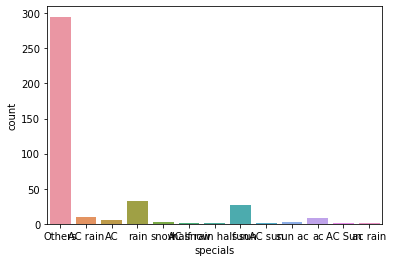

In [104]:
%matplotlib inline
sns.countplot(x=cobify.specials)

<AxesSubplot:xlabel='gas_type', ylabel='count'>

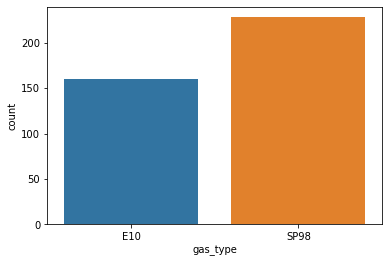

In [105]:
%matplotlib inline
sns.countplot(x=cobify.gas_type)   #can see used SP98 more than E10

<AxesSubplot:xlabel='refill_gas', ylabel='count'>

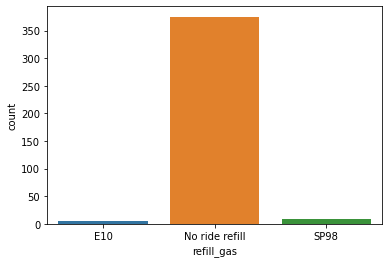

In [106]:
%matplotlib inline
sns.countplot(x=cobify.refill_gas)

In [107]:
# sns.countplot(data = cobify, x = "specials")
# plt.xticks(rotation=90)
# plt.show()

In [108]:
# sns.pairplot(data = cobify[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials"]], hue="specials")
# plt.show()

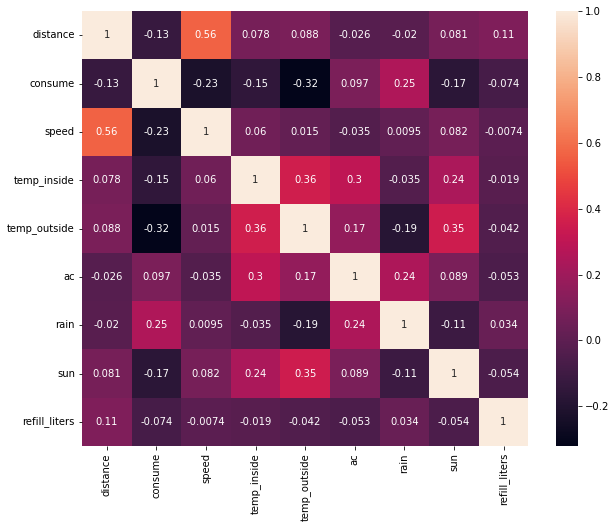

In [110]:
corr_matrix=cobify.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()    #nothing seems to be strongly collinear, highest is .56 between distance and speed, makes sense
#also consider that the categorical features (refill_gas, specials, gas type) aren't shown
#they hold categorical data 

### Compare between GAS TYPE & CONSUME.

gas_type       E10       SP98
mean       4.93125   4.899123
median     4.80000   4.700000
amin       3.70000   3.300000
amax      10.80000  12.200000


C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'gas_type & consume')

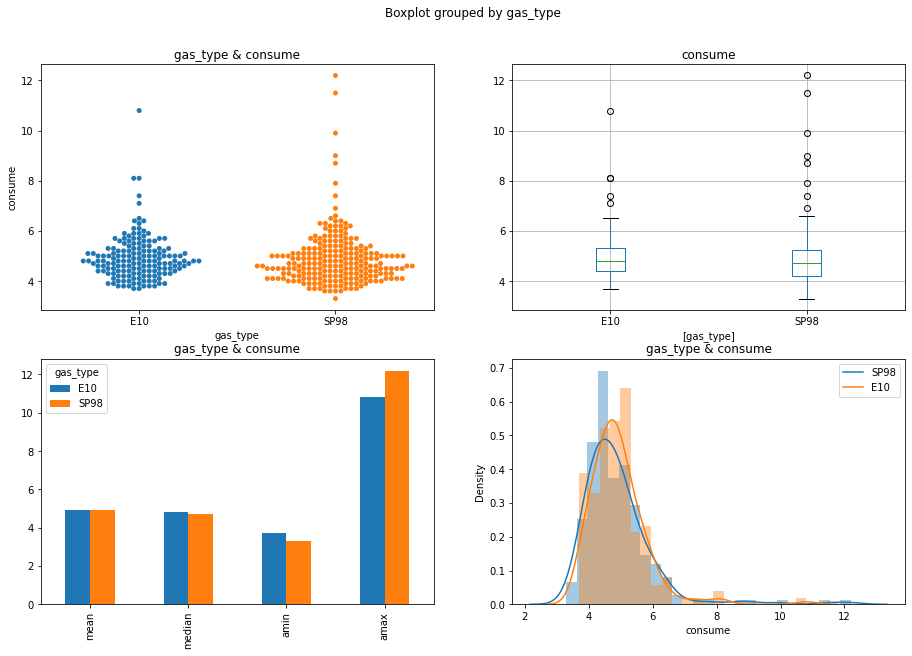

In [114]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.swarmplot(x=cobify['gas_type'],
              y=cobify['consume'],ax=ax1)
plt.title("gas_type & consume")

ax2=plt.subplot(2,2,2)
t=cobify[["consume","gas_type"]]
k2=t.boxplot(by="gas_type",ax=ax2)                                      

ax3=plt.subplot(2,2,3)
c=cobify.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3)
plt.title("gas_type & consume")

ax4=plt.subplot(2,2,4)
# t[t.gas_type=="SP98"].plot.kde(ax=ax4)
# t[t.gas_type=="E10"].plot.kde(ax=ax4)
sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

### Compare between AC & CONSUME.

#### When AC is on, car appears consume a little bit more.

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


ac             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
amin     3.30000   4.000000
amax    11.50000  12.200000


Text(0.5, 1.0, 'AC & consume')

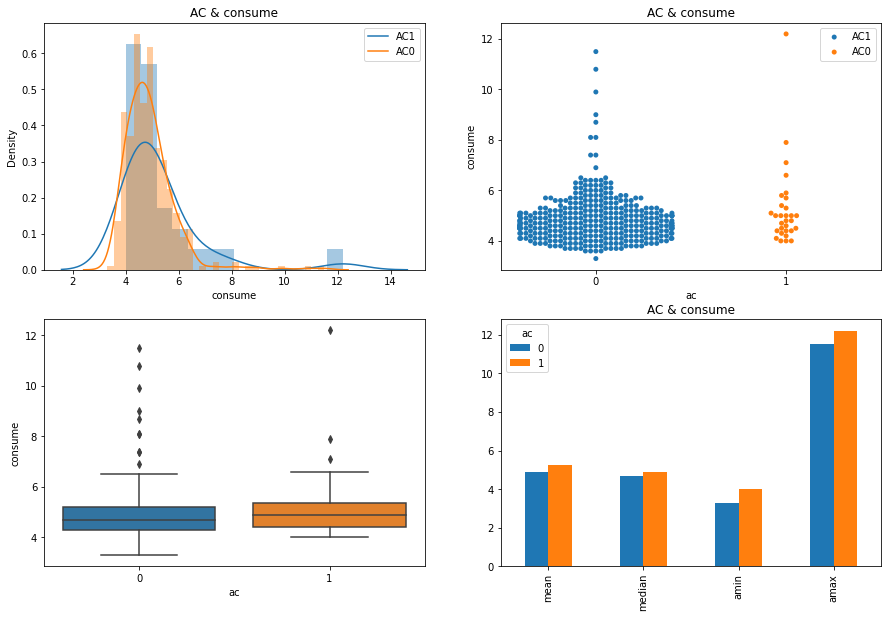

In [130]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(cobify[cobify.ac==1].consume,ax=ax1)
sns.distplot(cobify[cobify.ac==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=cobify.ac,y=cobify.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=cobify.ac,y=cobify.consume,ax=ax3)

ax4=plt.subplot(2,2,4)
c=cobify.groupby("ac")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax4)
plt.title("AC & consume")

When AC is on, the amount of E10 data is too limited, so it's hard to compare AC consumne between gas types.

Within the limited data:

- When AC is on or off, E10 looks both consume more than SP98.
- It's hard to see the sensiveness to AC between the two gas type.

### Compare between RAIN & CONSUME.

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'rain & consume')

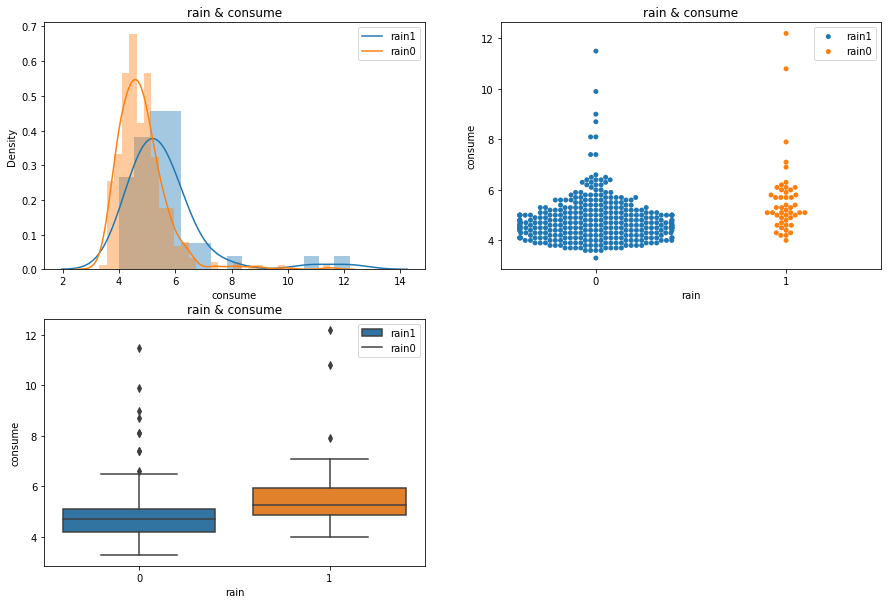

In [131]:
# rain
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(cobify[cobify.rain==1].consume,ax=ax1)
sns.distplot(cobify[cobify.rain==0].consume,ax=ax1)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=cobify.rain,y=cobify.consume,ax=ax2)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=cobify.rain,y=cobify.consume,ax=ax3)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

When it's rain, two type of gas:

- (1) When rains, both type of gas looks consume more
- (2) Whenever rain or not, E10 consume bit more than SP98.
- (3) E10 seems more sensitive to rain(consume raise)??????

In [135]:
df = cobify
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,Others,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,Others,E10,0,0,0,0.0,No ride refill
2,11.2,5.5,38,21.5,15.0,Others,E10,0,0,0,0.0,No ride refill
3,12.9,3.9,36,21.5,14.0,Others,E10,0,0,0,0.0,No ride refill
4,18.5,4.5,46,21.5,15.0,Others,E10,0,0,0,0.0,No ride refill
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,Others,SP98,0,0,0,0.0,No ride refill
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,0.0,No ride refill
385,16.0,3.8,45,25.0,19.0,Others,SP98,0,0,0,0.0,No ride refill
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,0.0,No ride refill


C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'E10:rain & consume')

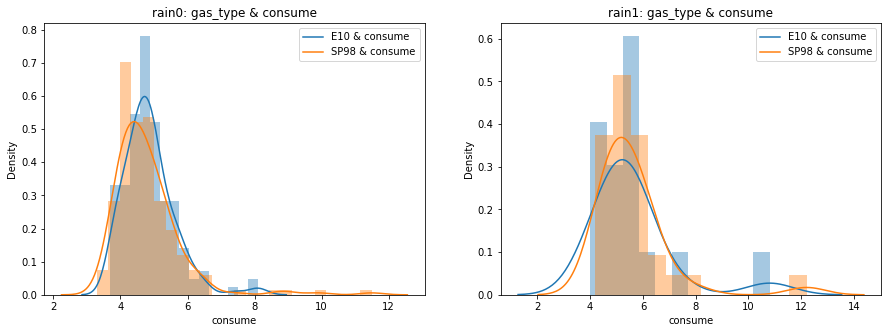

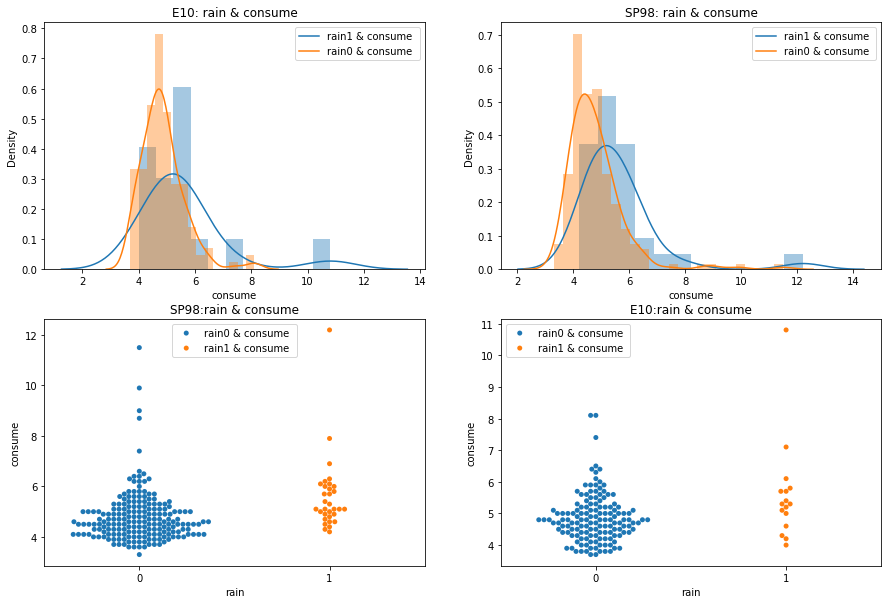

In [136]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="E10")].consume,ax=ax2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain1: gas_type & consume")

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.rain==1)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["rain1 & consume ","rain0 & consume"])
plt.title("E10: rain & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.rain==0)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["rain1 & consume ","rain0 & consume"])
plt.title("SP98: rain & consume")


ax3=plt.subplot(2,2,3)
sns.swarmplot(x=df[df.gas_type=="SP98"].rain,y=df[df.gas_type=="SP98"].consume,ax=ax3)
plt.legend(["rain0 & consume ","rain1 & consume"])
plt.title("SP98:rain & consume")

ax4=plt.subplot(2,2,4)
sns.swarmplot(x=df[df.gas_type=="E10"].rain,y=df[df.gas_type=="E10"].consume,ax=ax4)
plt.legend(["rain0 & consume ","rain1 & consume"])
plt.title("E10:rain & consume")

### Compare between SUN & CONSUME.

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'sun & consume')

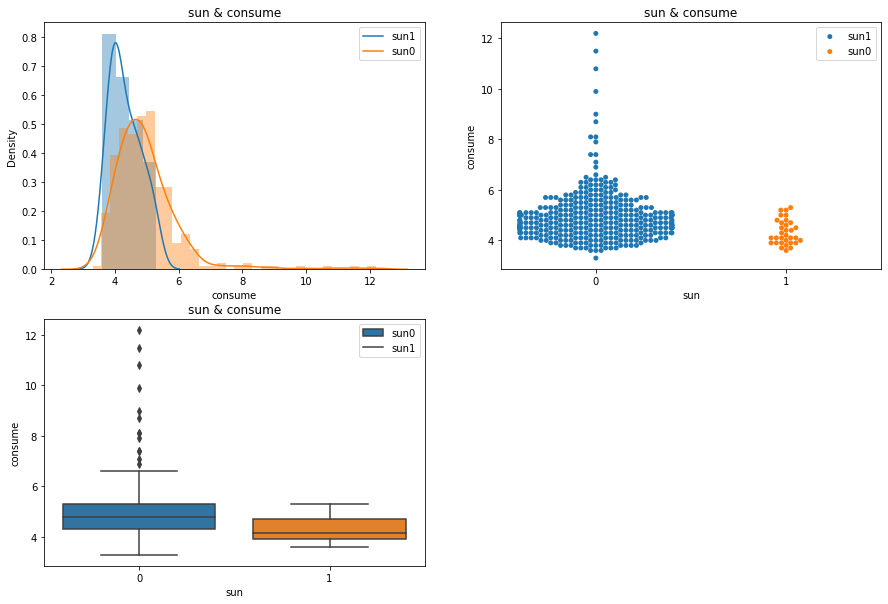

In [137]:
# sun
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.sun==1].consume,ax=ax1)
sns.distplot(df[df.sun==0].consume,ax=ax1)
plt.legend(["sun1","sun0"])
plt.title("sun & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.sun,y=df.consume,ax=ax2)
plt.legend(["sun1","sun0"])
plt.title("sun & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.sun,y=df.consume,ax=ax3)
plt.legend(["sun0","sun1"])
plt.title("sun & consume")

#### It performs the same in two different gas types

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gau82\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'E10:sun & consume')

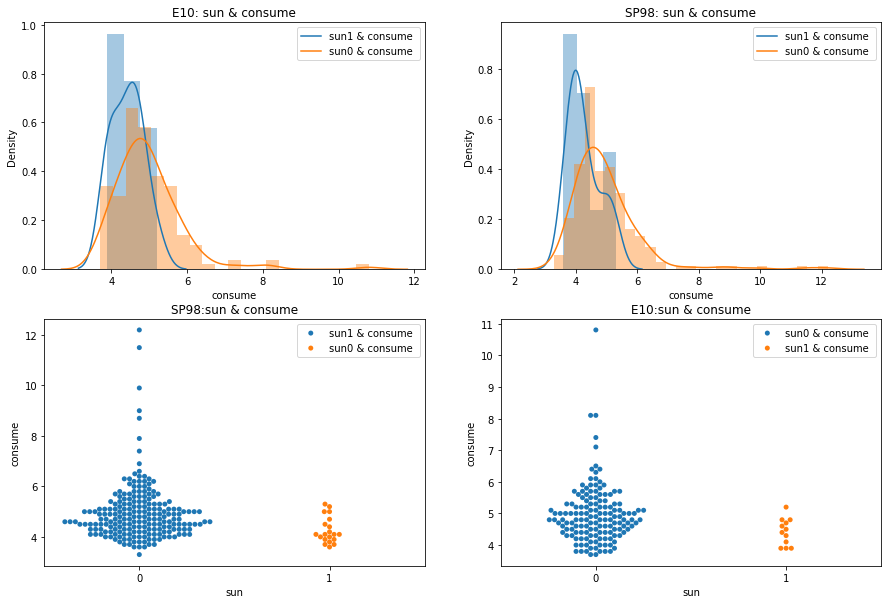

In [138]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.sun==1)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.sun==0)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["sun1 & consume ","sun0 & consume"])
plt.title("E10: sun & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.sun==1)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.sun==0)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["sun1 & consume ","sun0 & consume"])
plt.title("SP98: sun & consume")


ax3=plt.subplot(2,2,3)
sns.swarmplot(x=df[df.gas_type=="SP98"].sun,y=df[df.gas_type=="SP98"].consume,ax=ax3)
plt.legend(["sun1 & consume ","sun0 & consume"])
plt.title("SP98:sun & consume")

ax4=plt.subplot(2,2,4)
sns.swarmplot(x=df[df.gas_type=="E10"].sun,y=df[df.gas_type=="E10"].consume,ax=ax4)
plt.legend(["sun0 & consume ","sun1 & consume"])
plt.title("E10:sun & consume")

### Compare between DISTANCE & CONSUME.

The car consume greatly when the distance is less than about 5km.

And when the distance rise, the consume become rather stable.

Text(0.5, 1.0, 'distance & consume')

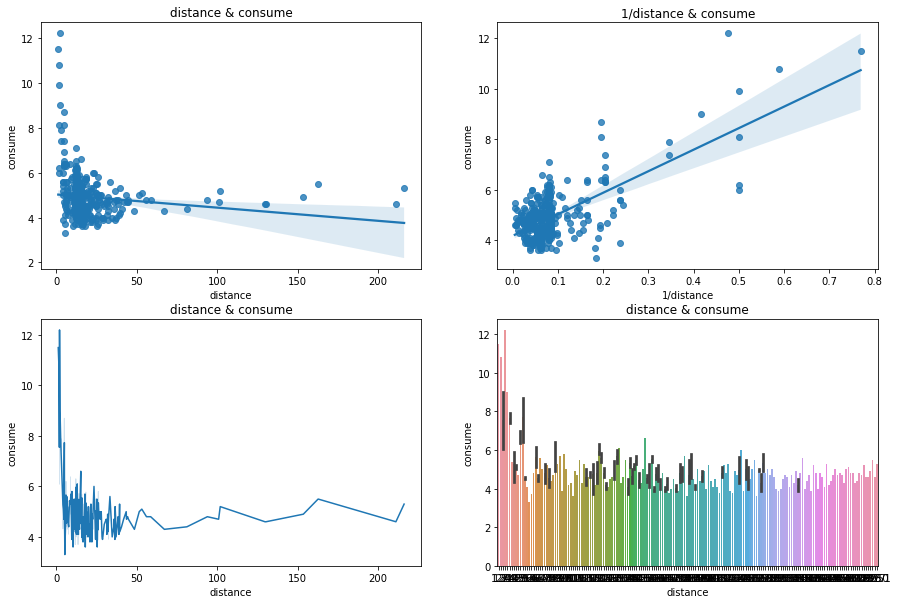

In [139]:
# distance&consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
# regression line scatterplot：
sns.regplot(x=df['distance'], y=df['consume'],ax=ax1)
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['distance'], y=df['consume'],ax=ax2)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")
ax3=plt.subplot(2,2,3)
sns.lineplot(x=df['distance'], y=df['consume'],ax=ax3)
plt.title("distance & consume")
ax4=plt.subplot(2,2,4)
sns.barplot(x=df['distance'], y=df['consume'],ax=ax4)
plt.title("distance & consume")

#### It performs the same in two different gas types.

In [ ]:
# Due to lack of time, I am unable to complete my analysis. However, based on the preliminary investigation it seems that 

Summary:
Whole data:

According to the whole data,there is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98.

Rain/AC:

When it rains or AC on,both type consume more.
Although still not enough evidence to confirm E10 consume more in both situation, but when there is no rain & AC off, the hypothesis is more significant. (E10 consume more than SP98)
E10 is still cheaper than SP98 in both situation.

DISTANCE:

The car consume greatly when the distance is less than about 5km.
And when the distance rise, the consume become rather stable.

SPEED:

Analysis needs to be done

Temp_outside:
Analysis needs to be done

In [ ]:
# E10 definately has a price advantgae over the the other fueltype. 
# The consumer should also think of switching over to electric type in long run. 

Predictions

Hypothesis: Even though it's 8 cents cheaper by the liter, the car consumes more gas with E10 and ultimately costs the company more money

Next steps would be: figuring out how much MORE the car really consumes with E10.

- Build a logistic regression model to predict which type of gas was inside car per ride: E10 or SP98?
- Hypothesis Testing comparing values between E10 and SP98
- Later would be nice to add more data with API or web scraping... but what kind? This is a very sparse data frame.
- Use Tableau and Slides.com to prepare a presentation with findings. Explore the data more in Tableau and see what connections I can visualize
